In [54]:
import numpy as np
%matplotlib notebook
import matplotlib.pyplot as plt
from IPython.display import display
import pandas as pd
import copy, math
from mpl_toolkits import mplot3d

In [5]:
print(plt.style.available)
plt.style.use("dark_background")

['Solarize_Light2', '_classic_test_patch', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn', 'seaborn-bright', 'seaborn-colorblind', 'seaborn-dark', 'seaborn-dark-palette', 'seaborn-darkgrid', 'seaborn-deep', 'seaborn-muted', 'seaborn-notebook', 'seaborn-paper', 'seaborn-pastel', 'seaborn-poster', 'seaborn-talk', 'seaborn-ticks', 'seaborn-white', 'seaborn-whitegrid', 'tableau-colorblind10']


In [7]:
np.set_printoptions(precision=2)

In [45]:
x1_size = np.array([2100, 2234, 2567, 2690, 2754, 2788, 2235, 2345, 4675, 6788, 6897, 4599])
x2_age = np.array([38, 45, 44, 52, 63, 49, 53, 57, 69, 74, 80, 66])
X_train = np.vstack((x1_size, x2_age)).T
y_train = np.array([5000, 6500, 6000, 7800, 8900, 8000, 7699, 4500, 8988, 9000, 4800, 6799])
print(f"Training set: {X_train}")
print(f"Price of houses are: {y_train}")
features = ["Size (sq-ft)", "Age(in years)", "Price(in 1000$)"]

Training set: [[2100   38]
 [2234   45]
 [2567   44]
 [2690   52]
 [2754   63]
 [2788   49]
 [2235   53]
 [2345   57]
 [4675   69]
 [6788   74]
 [6897   80]
 [4599   66]]
Price of houses are: [5000 6500 6000 7800 8900 8000 7699 4500 8988 9000 4800 6799]


In [36]:
# Characteristics of training set
shape = X_train.shape
print(f"Shape of our training set is: {shape}")
rows, col = shape
print(f"Rows = {rows}")
print(f"Columns = {col}")
print(f"X_train is a 2-dimensional array of size {rows} x {col}")

Shape of our training set is: (12, 2)
Rows = 12
Columns = 2
X_train is a 2-dimensional array of size 12 x 2


In [37]:
# Matrix properties
def compute_matrix_type(X):
    shp = X.shape
    r,c = shp
    if r == c:
        print(f"This is a square matrix of size {r} x {c}")
    elif r != c:
        print(f"This is a rectangular matrix of size {r} x {c}")
    elif r == 1:
        print(f"This is a row matrix of size {r} x {c}")
    elif c == 1:
        print(f"This is a column matrix of size {r} x {c}")

In [38]:
# Computing the shape of our data set 
compute_matrix_type(X_train)

This is a rectangular matrix of size 12 x 2


In [39]:
# Accessing rows and columns of a matrix
first_row = X_train[0]
third_row = X_train[2]
print(f"First row of X_train = {first_row} and third row is = {third_row}")
first_col = X_train[:,0]
sec_col = X_train[:,1]
print(f"First column of X_train = {first_col} \nSecond column of X_train = {sec_col}")

First row of X_train = [2100   38] and third row is = [2567   44]
First column of X_train = [2100 2234 2567 2690 2754 2788 2235 2345 4675 6788 6897 4599] 
Second column of X_train = [38 45 44 52 63 49 53 57 69 74 80 66]


In [46]:
# Displaying Data
house_dictionary = {features[0] : first_col, features[1] : sec_col, features[2] : y_train}
dataframe = pd.DataFrame(house_dictionary)
display(dataframe)

,Size (sq-ft),Age(in years),Price(in 1000$)
0,2100,38,5000
1,2234,45,6500
2,2567,44,6000
3,2690,52,7800
4,2754,63,8900
5,2788,49,8000
6,2235,53,7699
7,2345,57,4500
8,4675,69,8988
9,6788,74,9000


<IPython.core.display.Javascript object>


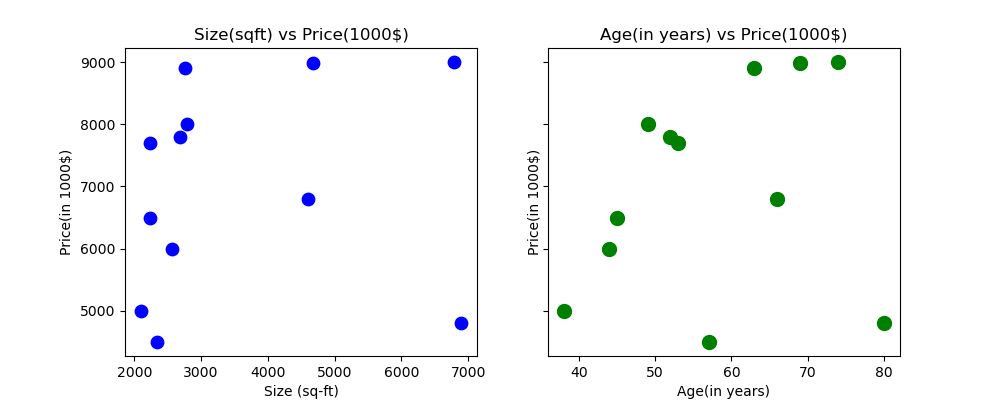

In [81]:
# Plotting each feature value against price column
fig, ax = plt.subplots(1, 2, figsize=(10,4), sharey = True)

ax[0].scatter(first_col, y_train, s = 80, c='b')
ax[0].set_xlabel(features[0])
ax[0].set_ylabel(features[2])
ax[0].set_title("Size(sqft) vs Price(1000$)")

ax[1].scatter(sec_col, y_train, s = 100, c='g')
ax[1].set_xlabel(features[1])
ax[1].set_ylabel(features[2])
ax[1].set_title("Age(in years) vs Price(1000$)")

plt.show()

<IPython.core.display.Javascript object>


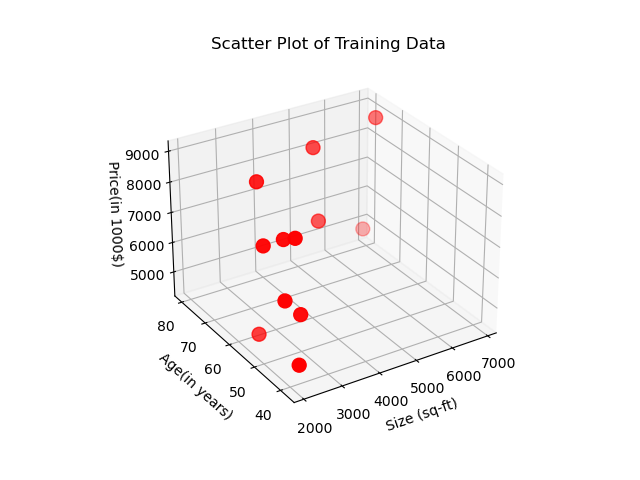

In [60]:
# Plotting the Data
x_axis = first_col # Size of houses
y_axis = sec_col # Age of houses
z_axis = y_train
fig = plt.figure()
ax= plt.axes(projection='3d')
ax.scatter(first_col, sec_col, y_train, s=100, c='r')
ax.set_xlabel(features[0])
ax.set_ylabel(features[1])
ax.set_zlabel(features[2])
ax.set_title("Scatter Plot of Training Data")
plt.show()

In [103]:
# Numpy mean and standard deviation
# Calculating mean of data
mean = np.mean(X_train)
print(f"Mean of the features is: {mean}")
# Calculating column wise mean
col_mean = np.mean(X_train, axis=0)
print(f"Column wise mean is: {col_mean}")
print(f"Shape of col wise mean: {col_mean.shape}")
# Calculating row wise mean
row_mean = np.mean(X_train, axis=1)
print(f"Row wise mean is: {row_mean}")
print(f"Shape of row wise mean: {row_mean.shape}")
# Standard deviation column wise
sigma = np.std(X_train, axis=0)
print(f"Standard deviation column wise is: {sigma}")
print(f"Shape of std deviation col wise: {sigma.shape}")

Mean of the features is: 1806.75
Column wise mean is: [3556.    57.5]
Shape of col wise mean: (2,)
Row wise mean is: [1069.  1139.5 1305.5 1371.  1408.5 1418.5 1144.  1201.  2372.  3431.
 3488.5 2332.5]
Shape of row wise mean: (12,)
Standard deviation column wise is: [1682.96   12.43]
Shape of std deviation col wise: (2,)


In [104]:
# Z score normaliazation
def z_score_norm(X):
    mu = np.mean(X, axis=0)
    sigma = np.std(X, axis=0)
    X_norm = (X - mu) / sigma
    return (X_norm, mu, sigma)

In [106]:
norm_ft, mean, std_deviation = z_score_norm(X_train)
print(f"Normalized features: {norm_ft}")
norm_price, _, _ = z_score_norm(y_train)
print(f"Normalized price: {norm_price}")

Normalized features: [[-0.87 -1.57]
 [-0.79 -1.01]
 [-0.59 -1.09]
 [-0.51 -0.44]
 [-0.48  0.44]
 [-0.46 -0.68]
 [-0.78 -0.36]
 [-0.72 -0.04]
 [ 0.66  0.92]
 [ 1.92  1.33]
 [ 1.99  1.81]
 [ 0.62  0.68]]
Normalized price: [-1.26 -0.32 -0.63  0.51  1.2   0.63  0.44 -1.58  1.26  1.26 -1.39 -0.13]


<IPython.core.display.Javascript object>


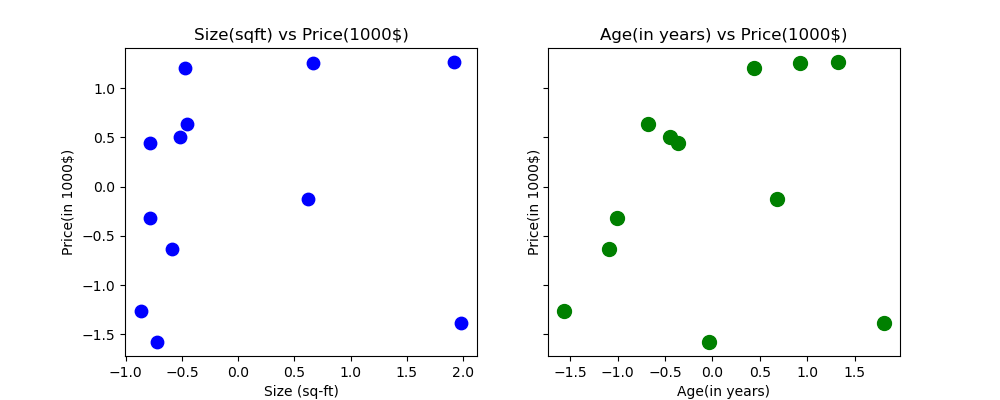

In [109]:
# Plotting normalized data
fig, ax = plt.subplots(1, 2, figsize=(10,4), sharey = True)

ax[0].scatter(norm_ft[:,0], norm_price, s = 80, c='b')
ax[0].set_xlabel(features[0])
ax[0].set_ylabel(features[2])
ax[0].set_title("Size(sqft) vs Price(1000$)")

ax[1].scatter(norm_ft[:,1], norm_price, s = 100, c='g')
ax[1].set_xlabel(features[1])
ax[1].set_ylabel(features[2])
ax[1].set_title("Age(in years) vs Price(1000$)")

plt.show()

<IPython.core.display.Javascript object>


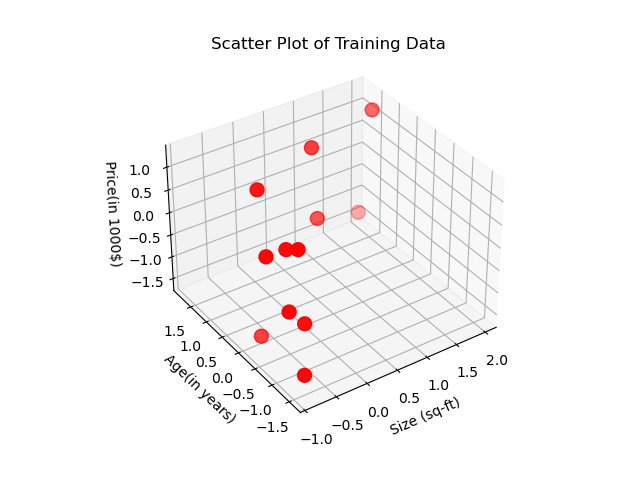

In [111]:
# Plotting the Data
x_axis = norm_ft[:,0] # Size of houses
y_axis = norm_ft[:,1] # Age of houses
z_axis = norm_price
fig = plt.figure()
ax= plt.axes(projection='3d')
ax.scatter(x_axis, y_axis, z_axis, s=100, c='r')
ax.set_xlabel(features[0])
ax.set_ylabel(features[1])
ax.set_zlabel(features[2])
ax.set_title("Scatter Plot of Training Data")
plt.show()

In [115]:
# Defining parameters
b_init = 3
w_init = np.array([1, 0])
print(f"w_init shape: {w_init.shape}, b_init: {b_init}")

w_init shape: (2,), b_init: 3


In [116]:
def predict_fun(X, w, b):
    fun = np.dot(X, w) + b
    return fun

In [117]:
def compute_cost(X, y, w, b):
    m = X.shape[0]
    cost = 0.0
    for i in range(m):
        f_wb_i = np.dot(X[i], w) + b # row wise computing prediction
        cost = cost + (f_wb_i - y[i])**2 # Accumulating cost value
    cost = cost / (2 * m)
    return cost

In [119]:
cost_model = compute_cost(norm_ft, norm_price, w_init, b_init)
print(f"Cost at optimal w: {cost_model:.2f}")

Cost at optimal w: 5.35


In [120]:
def compute_gradient(X, y, w, b):
    m,n = X.shape
    dj_dw = np.zeros((n,))
    dj_db = 0
    for i in range(m):
        err = (np.dot(X[i], w) + b) - y[i]
        for j in range(n):
            dj_dw[j] = dj_dw[j] + err * X[i,j]
        dj_db = dj_db + err
    dj_dw = dj_dw / m
    dj_db = dj_db / m
    
    return dj_db, dj_dw

In [121]:
tmp_dj_db, tmp_dj_dw = compute_gradient(norm_ft, norm_price, w_init, b_init)
print(f"Initial gradient wrt scale factor: {tmp_dj_db}")
print(f"Initial gradient wrt weight factor: {tmp_dj_dw}")

Initial gradient wrt scale factor: 3.0
Initial gradient wrt weight factor: [0.85 0.63]


In [153]:
def gradient_descent(X, y, w_in, b_in, cost_fun, gradient_fun, alpha, num_iter):
    J_history = []
    w = copy.deepcopy(w_in)
    b = b_in
    
    for i in range(num_iter):
        dj_db, dj_dw = gradient_fun(X, y, w, b)
        
        # Updating parameters
        w = w - alpha * dj_dw
        b = b - alpha * dj_db
        
        # Saving cost history at every iteration
        if i < 100000:
            J_history.append(cost_fun(X, y, w, b))
        if i%math.ceil(num_iter / 10) == 0:
            print(f"Iteration {i:4d} ; Cost {J_history[-1]:8.2f}")
            
    return w, b, J_history

In [164]:
# Parameters define
initial_w = np.zeros_like(w_init)
initial_b = 0
# Some gradient descent settings
itr = 100000
alpha = 0.0001
# Running gradient descent
w_final, b_final, J_hist= gradient_descent(norm_ft, y_train, initial_w, initial_b, compute_cost, compute_gradient, alpha, itr)

print(f"Found gradient descent: {b_final:0.2f}, {w_final}")

Iteration    0 ; Cost 25739878.29
Iteration 10000 ; Cost 4503374.34
Iteration 20000 ; Cost 1628169.52
Iteration 30000 ; Cost 1233447.67
Iteration 40000 ; Cost 1175455.07
Iteration 50000 ; Cost 1163975.79
Iteration 60000 ; Cost 1159543.45
Iteration 70000 ; Cost 1156661.45
Iteration 80000 ; Cost 1154462.28
Iteration 90000 ; Cost 1152730.51
Found gradient descent: 6998.52, [-297.98  634.53]


In [165]:
for i in range(rows):
    print(f"Prediction: {np.dot(norm_ft[i], w_final) + b_final:.2f}, target value: {y_train[i]}")

Prediction: 6261.12, target value: 5000
Prediction: 6594.64, target value: 6500
Prediction: 6484.65, target value: 6000
Prediction: 6871.15, target value: 7800
Prediction: 7421.21, target value: 8900
Prediction: 6700.69, target value: 8000
Prediction: 7002.75, target value: 7699
Prediction: 7187.41, target value: 4500
Prediction: 7387.30, target value: 8988
Prediction: 7268.36, target value: 9000
Prediction: 7555.27, target value: 4800
Prediction: 7247.65, target value: 6799
